In [18]:
import os
import json
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

# from utils import f
from utils import *

MHz = 1e6
GHz = 1e9
kHz = 1e3

us = 1e-6
ns = 1e-9


fidelity_matrix = [[0.8367, 0.1633], [0.2573, 0.7427]]

state_0 = 0.280 * 1.05
state_1 = 0.860 * 0.95
state_mean = (state_0 + state_1) / 2

print("state mean", state_mean)

a = state_1 - state_0

# print(a)

# state = 0.86  # should be 0

# state = (state - 0.5) / a + state_mean

# print(state)

# print(fidelity_matrix @ np.array([1 - state, state]))  # measured

T2 = 14 * us
T2_limit = 1 / np.pi / T2
print("T2 limit is ", T2_limit / kHz, "kHz")

xlim = 0.2


state mean 0.5555
T2 limit is  22.736420441699334 kHz


Text(0.5, 1.0, 'Echo Lorentzian ^1/2')

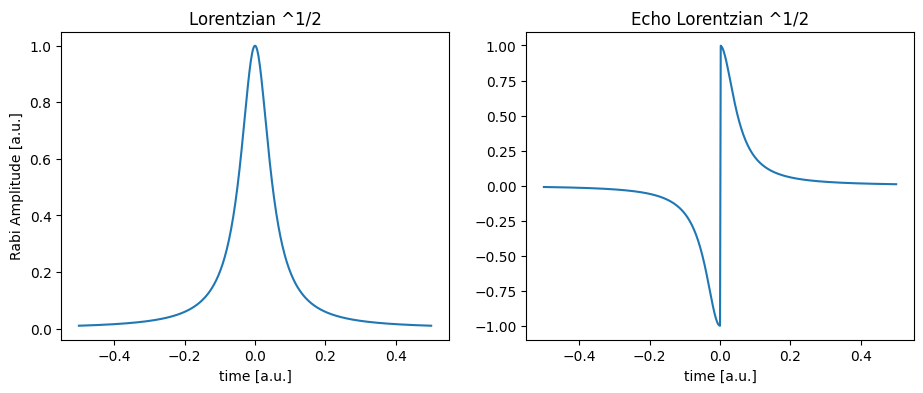

In [19]:
t = np.linspace(-0.5, 0.5, 501)

y = 1 / (1 + (t / 0.05) ** 2)

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

ax[0].plot(t, y)

ax[0].set_xlabel("time [a.u.]")
ax[1].set_xlabel("time [a.u.]")
ax[0].set_ylabel("Rabi Amplitude [a.u.]")


y_echo = y * (2 * np.heaviside(t, 0) - 1)

plt.plot(t, y_echo)

ax[0].set_title(r"Lorentzian ^1/2")
ax[1].set_title("Echo Lorentzian ^1/2")

We extract the files and print the names


In [20]:
def extract_data_from_json(file_path):
    with open(file_path, "r") as f:
        data = json.load(f)
    return data


# data_folder_path = "data/data_2"

data_folder_path = "data/2025-09-17"

files = [file for file in os.listdir(data_folder_path) if file.endswith(".json")]


# print the files with their index
[print(f"{i}: {file}") for i, file in enumerate(files)]

0: lorentzian-echo-True-2d-30.0-us-0.0002.json
1: lorentzian-echo-True-2d-60.0-us-0.0002.json
2: lorentzian-echo-True-2d-20.0-us-0.0002.json
3: lorentzian-echo-True-2d-10.0-us-0.0002.json
4: lorentzian-echo-True-2d-40.0-us-0.0002.json
5: lorentzian-echo-True-2d-50.0-us-0.0002.json
6: lorentzian-echo-False-2d-30.0-us-0.0002.json
7: lorentzian-echo-False-2d-20.0-us-0.0002.json
8: lorentzian-echo-False-2d-10.0-us-0.0002.json
9: lorentzian-echo-False-2d-200.0-us-0.9999.json
10: lorentzian-echo-False-2d-40.0-us-0.0002.json
11: lorentzian-echo-False-2d-50.0-us-0.0002.json


[None, None, None, None, None, None, None, None, None, None, None, None]

Correct the file names to ease building the nested dictionary.


In [21]:
def rename_file(old_name: str, new_name: str):
    """
    Rename a single file to a new name (keeping the same directory).

    Parameters:
        old_path (str): The full path of the existing file.
        new_name (str): The new file name (not path).
    """
    directory = data_folder_path
    old_path = os.path.join(directory, old_name)
    new_path = os.path.join(directory, new_name)
    os.rename(old_path, new_path)
    print(f"Renamed: {old_path} → {new_path}")
    return new_path


new_files = []

for i, file in enumerate(files):
    new_file = file.replace("1e-05", "0.00001")
    new_file = new_file.replace("5e-05", "0.00005")
    new_file = new_file.replace("us_0", "us-0")

    print(f"{i}: {file}")
    print(f"{i}: {new_file}")
    rename_file(file, new_file)

0: lorentzian-echo-True-2d-30.0-us-0.0002.json
0: lorentzian-echo-True-2d-30.0-us-0.0002.json
Renamed: data/2025-09-17/lorentzian-echo-True-2d-30.0-us-0.0002.json → data/2025-09-17/lorentzian-echo-True-2d-30.0-us-0.0002.json
1: lorentzian-echo-True-2d-60.0-us-0.0002.json
1: lorentzian-echo-True-2d-60.0-us-0.0002.json
Renamed: data/2025-09-17/lorentzian-echo-True-2d-60.0-us-0.0002.json → data/2025-09-17/lorentzian-echo-True-2d-60.0-us-0.0002.json
2: lorentzian-echo-True-2d-20.0-us-0.0002.json
2: lorentzian-echo-True-2d-20.0-us-0.0002.json
Renamed: data/2025-09-17/lorentzian-echo-True-2d-20.0-us-0.0002.json → data/2025-09-17/lorentzian-echo-True-2d-20.0-us-0.0002.json
3: lorentzian-echo-True-2d-10.0-us-0.0002.json
3: lorentzian-echo-True-2d-10.0-us-0.0002.json
Renamed: data/2025-09-17/lorentzian-echo-True-2d-10.0-us-0.0002.json → data/2025-09-17/lorentzian-echo-True-2d-10.0-us-0.0002.json
4: lorentzian-echo-True-2d-40.0-us-0.0002.json
4: lorentzian-echo-True-2d-40.0-us-0.0002.json
Rename

Plot fucntions:


In [22]:
import os
import json
from collections import defaultdict


# nested dict factory
def nested_dict():
    return defaultdict(nested_dict)


data_dict = defaultdict(nested_dict)

# folder where your files are
folder = data_folder_path

for fname in os.listdir(folder):
    if fname.endswith(".json") and fname.startswith("lorentzian-echo"):
        # Example: lorentzian-echo-True-2d-60.0-us_0.0001.json
        parts = fname.split("-")
        true_false = bool(parts[2].lower() == "true")  # "true" or "false"
        # Get number before "us"
        time_val = parts[4]  # "60.0-us_0.0001"
        time_key = float(time_val)  # use int keys like 30, 40, 50, 60
        time_key = int(time_key)  # convert to int for cleaner keys

        # Get the number after "_"
        rate_str = fname.split("-")[-1].replace(".json", "")  # "0.0001"
        rate_val = float(rate_str)

        # Load JSON content
        with open(os.path.join(folder, fname), "r") as f:
            content = json.load(f)

        # Insert into dict
        data_dict[true_false][time_key][rate_val] = content

# Convert defaultdicts to normal dicts
import json


def dictify(d):
    if isinstance(d, defaultdict):
        d = {k: dictify(v) for k, v in d.items()}
    return d


final_dict = dictify(data_dict)

for key, value in final_dict.items():
    # sort the inner dict by keys (time values)
    final_dict[key] = dict(sorted(value.items()))

# optional: save the nested dict
with open("combined_data.json", "w") as f:
    json.dump(final_dict, f, indent=2)


print("Data combined and saved to combined_data.json")

Data combined and saved to combined_data.json


In [23]:
# def find_max(x_data, y_data, z_data):
#     bound = 0.05*MHz
#     mask = (x_data >= -bound) & (x_data <= bound)
#     z_masked = z_data[:, mask]
#     x_masked = x_data[mask]

#     min_indices = np.argmin(z_masked, axis=1)
#     x_min = x_masked[min_indices]

#     # x_min = np.array([x_data[np.argmin(z,bounds=[0, 1])] for z in z_data])
#     # ax[0].plot(x_min/1e6,y_data, 'r--', label='Min across amplitudes')

#     return x_min,y_data


# def adding_max(data):
#     for echo, time_dict in data.items():
#         for time_key, cutoff_dict in time_dict.items():
#             for cutoff, entry in cutoff_dict.items():
#                 x,y,z = (np.array(entry["sweep_parameters"]["detuning"]), np.array(entry["sweep_parameters"]["amplitudes"]), np.array(entry["measured_data"]["states"]))
#                 x_min,_= find_max(x,y,z)
#                 x_min = x_min.tolist()


#                 if "analysis" not in entry:
#                     entry["analysis"] = {}
#                 entry["analysis"]['xmin'] = x_min
#                 entry.setdefault("analysis", {})['xmin'] = x_min


#     with open("combined_data_with_analysis.json", "w") as f:
#         json.dump(data, f, indent=2)


# adding_max(final_dict)

Echo: True, Time keys: [10, 20, 30, 40, 50, 60]
length:   10: [0.0002]
Skipped
length:   20: [0.0002]
Skipped
length:   30: [0.0002]
Skipped
length:   40: [0.0002]
Skipped
length:   50: [0.0002]
Skipped
length:   60: [0.0002]
Skipped
Echo: False, Time keys: [10, 20, 30, 40, 50, 200]
length:   10: [0.0002]
    0.0002: z_zero: 202
mu, fwhm -812.9207825437842 33399.31413625362
mu, fwhm 0 0
mu, fwhm 0 0
mu, fwhm 0 0
mu, fwhm 0 0


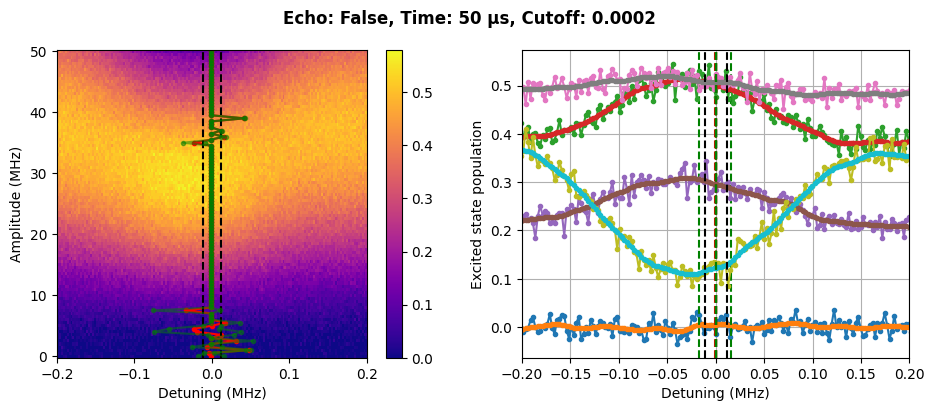

length:   20: [0.0002]
    0.0002: z_zero: 202
mu, fwhm 20314.01160428624 34343.99366089932
mu, fwhm 0 0
mu, fwhm 0 0
mu, fwhm 6487.981289164837 36279.67631700826
mu, fwhm 0 0


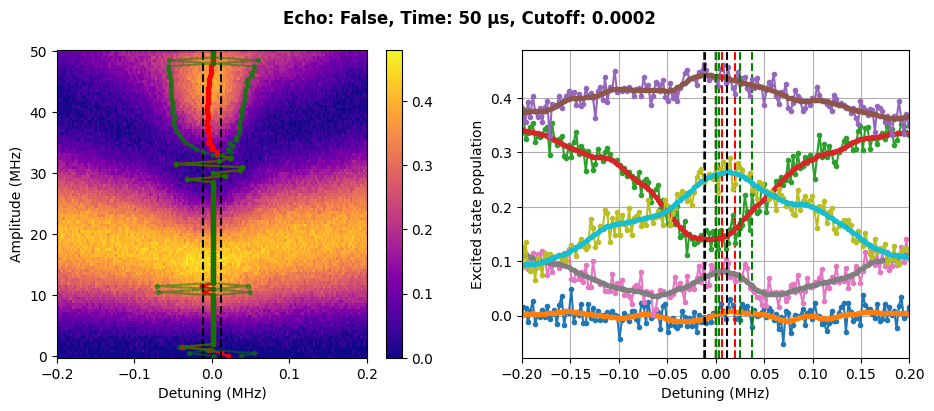

length:   30: [0.0002]
    0.0002: z_zero: 202
mu, fwhm 31356.77845355653 25442.958621854792
mu, fwhm 2998.2541102473288 49963.61465625754
mu, fwhm 0 0
mu, fwhm 0 0
mu, fwhm -791.4982826315816 53131.517734668945


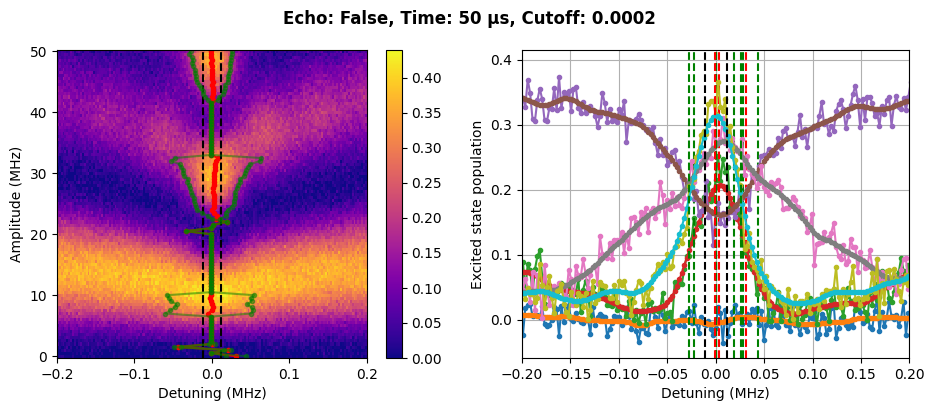

length:   40: [0.0002]
    0.0002: z_zero: 202
mu, fwhm 39957.03619822707 16180.819850485268
mu, fwhm 0 0
mu, fwhm 0 0
mu, fwhm 4828.79769113276 27693.051741410873
mu, fwhm 3961.180827222637 46176.67513894099


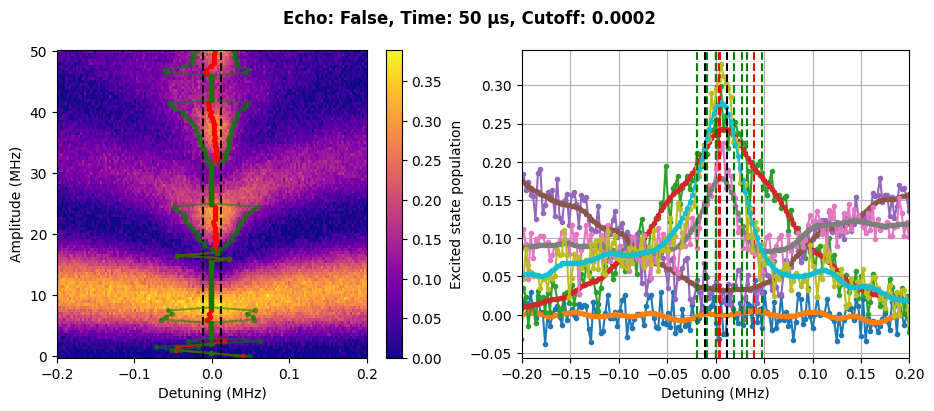

length:   50: [0.0002]
    0.0002: z_zero: 202
mu, fwhm 14826.86932099073 71575.18263658162
mu, fwhm 0 0
mu, fwhm 1852.9127149054411 48860.45459669397
mu, fwhm -2257.421696590094 82085.36232012376
mu, fwhm 1276.8472231337626 63735.56440151728


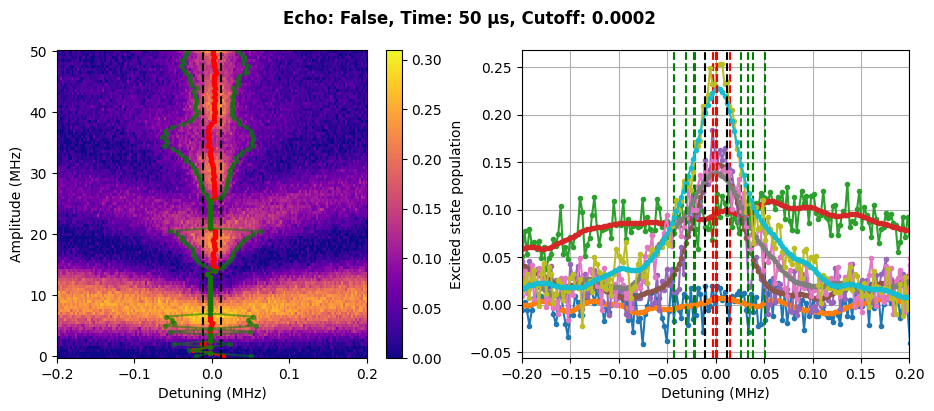

length:   200: [0.9999]
Skipped


In [24]:
def plot_1d_line(ax, x, z, echo=False):

    mu, fwhm, _ = FWHM(x, z, echo=echo, plot=False)

    print("mu, fwhm", mu, fwhm)

    z_smooth = gaussian_filter(z, sigma=4)

    ax.plot(x / MHz, z, ".-")
    ax.plot(x / MHz, z_smooth, ".-")

    plt.axvline(mu / MHz, color="r", linestyle="--")
    plt.axvline((mu + fwhm / 2) / MHz, color="g", linestyle="--")
    plt.axvline((mu - fwhm / 2) / MHz, color="g", linestyle="--")

    ax.set_xlabel("Detuning (MHz)")
    ax.set_ylabel("Excited state population")
    ax.grid()


def plot_2d_heatmap(ax, x, y, z):

    bound = lambda x: np.ceil(x * 100) / 100

    vmax = bound(z.max())

    c = ax.pcolormesh(x / 1e6, y, z, shading="auto", cmap="plasma", vmin=0, vmax=vmax)
    colorbar = plt.colorbar(c, ax=ax)
    # colorbar.set_label("Excited state population")
    ax.set_xlabel("Detuning (MHz)")
    ax.set_ylabel("Amplitude (MHz)")


def plot_max(ax, x_data, y_data, z_data, echo):
    bound = 0.05 * MHz
    mask = (x_data >= -bound) & (x_data <= bound)
    z_masked = z_data[:, mask]
    x_masked = x_data[mask]
    if echo:
        min_indices = np.argmin(z_masked, axis=1)
    else:
        min_indices = np.argmax(z_masked, axis=1)
    x_min = x_masked[min_indices]

    # x_min = np.array([x_data[np.argmin(z,bounds=[0, 1])] for z in z_data])
    ax[0].plot(x_min / 1e6, y_data, "r--", label="Min across amplitudes")

    return x_min, y_data


def plot(cutoff, entry, echo=False):

    sweep = entry["sweep_parameters"]
    meas = entry["measured_data"]
    x_data = np.asarray(sweep["detuning"])
    y_data = np.asarray(sweep["amplitudes"])
    z_data = np.asarray(meas["states"])

    fig, axs = plt.subplots(1, 2, figsize=(11, 4))

    mus, fwhms, snrs = FWHM_2D(x_data, y_data, z_data, echo=echo)

    z_zero = z_data[0]

    print("z_zero:", len(z_zero))

    x_shift = np.mean(mus)
    x_data -= x_shift
    mus -= x_shift

    state_mean = 0.5
    a = 1 - 2 * np.mean(z_zero)
    z_data = ((z_data - state_mean) / a + 0.5) / 2

    # min_x = min(x_data[-1] - x_shift, x_data[0] - x_shift)

    axs[0].plot(mus / 1e6, y_data, ".-", label="FWHM across amplitudes", color="r")
    plot_1d_line(axs[1], x_data, z_data[0], echo=echo)
    plot_1d_line(axs[1], x_data, z_data[len(y_data) // 2], echo=echo)
    plot_1d_line(axs[1], x_data, z_data[len(y_data) // 3], echo=echo)
    plot_1d_line(axs[1], x_data, z_data[len(y_data) * 2 // 3], echo=echo)
    plot_1d_line(axs[1], x_data, z_data[-1], echo=echo)
    plot_2d_heatmap(axs[0], x_data, y_data, z_data)

    axs[0].axvline(T2_limit / 2 / 1e6, color="k", linestyle="--")
    axs[0].axvline(-T2_limit / 2 / 1e6, color="k", linestyle="--")

    axs[1].axvline(T2_limit / 2 / 1e6, color="k", linestyle="--")
    axs[1].axvline(-T2_limit / 2 / 1e6, color="k", linestyle="--")

    # # z_data = gaussian_filter(z_data, sigma=0)
    # # FWHM(x_data,z_data[len(y_data) // 2])
    # ax[0].set_xlim(-min_x / 1e6, min_x / 1e6)
    # ax[1].set_xlim(-min_x / 1e6, min_x / 1e6)
    # # ax[0].plot(x_min,y_data, 'r--', label='Min across amplitudes')
    # fwhms = fwhms / 1e6
    # mus = mus / 1e6
    # plt.tight_layout()

    axs[0].plot(
        mus / 1e6 + fwhms / 1e6 / 2,
        y_data,
        ".-",
        label="FWHM across amplitudes",
        color="g",
        alpha=0.5,
    )
    axs[0].plot(
        mus / 1e6 - fwhms / 1e6 / 2,
        y_data,
        ".-",
        label="FWHM across amplitudes",
        color="g",
        alpha=0.5,
    )

    axs[0].set_xlim(-xlim, xlim)
    axs[1].set_xlim(-xlim, xlim)

    fig.suptitle(
        f"Echo: {echo}, Time: {time_key} µs, Cutoff: {cutoff}",
        fontsize=12,
        fontweight="bold",
    )
    plt.show()

    return x_data, y_data, z_data, mus, fwhms, snrs


from collections import defaultdict


def visualize_results(data, echo_flag=True, cutoff_flag=0.001):
    fwhms_dict = defaultdict(dict)
    mus_dict = defaultdict(dict)
    snrs_dict = defaultdict(dict)
    for echo, time_dict in data.items():
        print(f"Echo: {echo}, Time keys: {list(time_dict.keys())}")
        for time_key, cutoff_dict in time_dict.items():
            print("length: " f"  {time_key}: {list(cutoff_dict.keys())}")
            for cutoff, entry in cutoff_dict.items():
                if cutoff == cutoff_flag and echo == echo_flag:
                    print(f"    {cutoff}: ", end="")

                    _, _, _, mus, fwhms, snrs = plot(cutoff, entry, echo=echo)

                    fwhms_dict[echo][str(time_key)] = fwhms
                    mus_dict[echo][str(time_key)] = mus
                    snrs_dict[echo][str(time_key)] = snrs
                else:
                    print("Skipped")
    return mus_dict, fwhms_dict, snrs_dict


mus_dict, fwhms_dict, snrs_dict = visualize_results(
    final_dict, echo_flag=False, cutoff_flag=0.0002
)
# print("FWHMs dict:", fwhms_dict[True].keys( ))
# print("Mu dict:", mus_dict)

# with open("combined_data.json", "w") as f:
#     json.dump(final_dict, f, indent=2)

In [25]:
data1 = final_dict[True]
data2 = final_dict[False]


In [26]:
i = 0
m = 1
# c = list(final_dict[True][20].keys())
y = np.array(final_dict[True][30][0.0002]["sweep_parameters"]["amplitudes"])



def analysis(fwhms_dict, mus_dict, snrs_dict,name):
    fwhm_avg_dict = {}
    fwhm_var_dict = {}
    snrs_avg_dict = {}
    snrs_var_dict = {}

    for echo_key, echo_value in fwhms_dict.items():
        print("Echo key:", echo_key)
        for key, value in echo_value.items():
            print(key)
            print("  Key:", key)
            m = int(key) // 10
            print(m)
            mus = mus_dict[echo_key][key] / T2_limit
            mus = mus_dict[echo_key][key] / T2_limit
            mus = gaussian_filter(mus, sigma=1)
            fwhms = fwhms_dict[echo_key][key] / T2_limit
            snrs = snrs_dict[echo_key][key]
            snrs = gaussian_filter(snrs, sigma=1)



            if echo_key:
                fig, axs = plt.subplots(1, 2, figsize=(10, 4))
                # if key == "40":
                
                fwhms_cut = fwhms[i:]
                fwhms_cut[fwhms_cut < 0.7] = np.nan
                y_cut = y[i:]

                snrs = snrs[i:]
                snrs[snrs == 0] = np.nan
                
                
                axs[0].plot(
                    y_cut, fwhms_cut, ".-", color=f"C{m}", label=f"Echo {key} us"
                )
                fwhms = gaussian_filter(fwhms, sigma=4)
                axs[0].plot(
                    y_cut, fwhms, ".-", color=f"C{m}", label=f"Echo {key} us"
                )

                
                fwhm_avg = np.nanmean(fwhms_cut)
                fwhm_var = np.nanvar(fwhms_cut)
                snrs_avg = np.nanmean(snrs)
                snrs_var = np.nanvar(snrs)

                fwhm_avg_dict[key] = fwhm_avg
                fwhm_var_dict[key] = fwhm_var
                snrs_avg_dict[key] = snrs_avg
                snrs_var_dict[key] = snrs_var
                print("mean", fwhm_avg)
                # axs[0].plot(y_cut, linear_func(y_cut, *args), ".-", color=f"C{m}", label=f"Echo {key} us")

                axs[0].set_title(f"length = {key} ")
                axs[0].axhline(
                    fwhm_avg, color=f"C{m}", linestyle="--", label=f"average"
                )
                axs[0].axhline(
                    1, color="k", linestyle="-", label=f"T2 limit"
                )
                axs[0].set_ylim(0, 4)

                axs[1].plot(
                    y_cut, snrs, ".-", color=f"C{m}", label=f"Echo {key} us SNR"
                )
                
                

                axs[1].set_xlabel("Amplitude (MHz)")
                axs[0].set_xlabel("Amplitude (MHz)")
                
                axs[0].set_ylabel("FWHM (MHz) / T2 limit")
                axs[1].set_ylabel("SNR")
                
                axs[0].legend()


                plt.show()
                
                
    final_dict = {
        "fwhm_avg_dict": fwhm_avg_dict,
        "fwhm_var_dict": fwhm_var_dict,
        "snrs_avg_dict": snrs_avg_dict,
        "snrs_var_dict": snrs_var_dict,
    }
            
    with open(f"data/data_dicts/{name}.json", "w") as f:
        json.dump(final_dict, f, indent=2)
            
        

    return final_dict   



name = "analysis_dict_0.0002"
analysis_dict = analysis(
    fwhms_dict, mus_dict, snrs_dict,name
)






Echo key: False
10
  Key: 10
1
20
  Key: 20
2
30
  Key: 30
3
40
  Key: 40
4
50
  Key: 50
5


In [27]:
def visualize_results(data):
    for echo, time_dict in data.items():
        print(echo, list(time_dict.keys()))
        for time_key, cutoff_dict in time_dict.items():
            print(f"  {time_key}: {list(cutoff_dict.keys())}")
            for cutoff, entry in cutoff_dict.items():

                # Extract data
                sweep = entry["sweep_parameters"]
                meas = entry["measured_data"]
                x = np.asarray(sweep["detuning"])
                y = np.asarray(sweep["amplitudes"])
                z = np.asarray(meas["states"])

                x_min = np.array(entry.get("analysis", {}).get("max_vector", None))
                x_min = gaussian_filter(x_min, sigma=0)
                if echo == True and cutoff == 0.0001:
                    plt.plot(x_min / 1e6)

                plt.axhline(y=0.025, color="red", linestyle="--")
                plt.axhline(y=-0.0245, color="green", linestyle="--")


# visualize_results(final_dict)

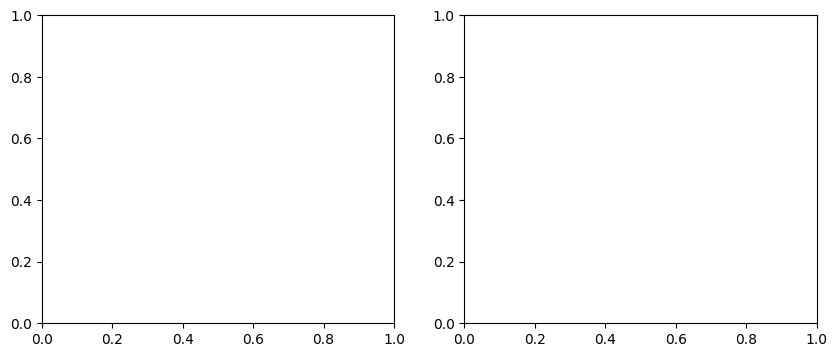

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))


def plot_analysis(axs, analysis_dict, color="C1",label="Cutoff 0.0002"):
    fwhm_avg_dict = analysis_dict["fwhm_avg_dict"]
    fwhm_var_dict = analysis_dict["fwhm_var_dict"]
    snrs_avg_dict = analysis_dict["snrs_avg_dict"]
    snrs_var_dict = analysis_dict["snrs_var_dict"]

    ls = list(fwhm_avg_dict.keys())

    print(ls)

    axs[0].plot(ls, list(fwhm_avg_dict.values()), ".-", color=color,label = label)
    axs[0].errorbar(
        ls,
        list(fwhm_avg_dict.values()),
        yerr=list(fwhm_var_dict.values()),
        fmt="o",
        capsize=5,
        color=color,
    )
    axs[0].set_xlabel("Pulse length (us)")
    axs[0].set_ylabel(r"FWHM / $T_2$ limit ")
    axs[0].set_title("Average FWHM vs Pulse Length")
    axs[0].set_ylim(0, 4)
    axs[0].axhline(1, color="r", linestyle="--")

    # axs[1].plot(ls, list(snrs_avg_dict.values()), ".-")
    axs[1].plot(ls, list(snrs_avg_dict.values()), ".-", color=color, label=label)
    axs[1].errorbar(
        ls,
        list(snrs_avg_dict.values()),
        yerr=list(snrs_var_dict.values()),
        fmt="o",
        capsize=5,
        color=color,
    )

    axs[1].set_xlabel("Pulse length (us)")
    axs[1].set_ylabel("Average SNR")
    axs[1].set_title("Average SNR vs Pulse Length")
    axs[1].set_ylim(0, 0.20)
    axs[0].legend()




# plot_analysis(axs, analysis_dict, color="C1",label="Cutoff 0.0002")

[]
['30', '40', '50', '60']
['30', '40', '50', '60']


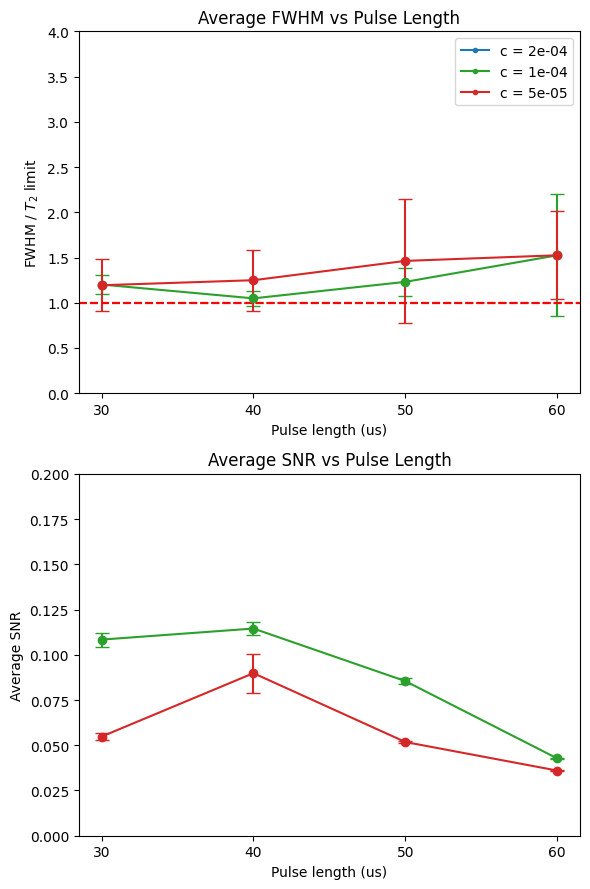

In [29]:
files = [file for file in os.listdir("data/data_dicts") if file.endswith(".json")]

fig, axs = plt.subplots(2, 1, figsize=(6, 9))

files = sorted(files, key=lambda x: -float(x.split("_")[-1].replace(".json", "")))

for i, file in enumerate(files):
    with open(os.path.join("data/data_dicts", file), "r") as f:

        if i != 1:
            analysis_dict = json.load(f)
            cutoff = file.split("_")[-1].replace(".json", "")

            plot_analysis(
                axs, analysis_dict, color=f"C{i}", label=f"c = {float(cutoff):.0e}"
            )


plt.tight_layout()
plt.savefig("figs/fwhm_vs_time.pdf", dpi=300)

plt.show()